In [173]:
import math
import numpy as np

from qiskit import Aer, BasicAer, QuantumCircuit, transpile, execute

from qiskit.circuit import ClassicalRegister, QuantumRegister, QuantumCircuit, library
from qiskit.circuit.library.standard_gates import CPhaseGate

from qiskit.quantum_info import Statevector, DensityMatrix, Operator, Pauli, Kraus
from qiskit.quantum_info import average_gate_fidelity, process_fidelity,state_fidelity

from qiskit.visualization  import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_histogram

from qiskit.providers.aer import AerSimulator

from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

from qiskit.test.mock import FakeVigo

# Quantum Circuits and Operations

## Constructing Quantum Circuits

### `QuantumCircuit` class

#### Drawing and barrier

#### Measuring

#### Obtaining info

#### Manipulating 

#### Saving a state when running a ciruit on `AerSimulator`

### `QuantumRegister` class`

### `ClassicalRegister` class`

## Instructions and Gates

### `Instruction` class

### `Gate` Class

### `ControlledGate` class

## Parameterized Quantum Circuits

### Creating a `Parameter` Instance

### Using the `ParameterVector` class

# Running Quantum Circuits



The `qiskit.providers.basicaer` module contains a basic set of simulators implemented in Python, often referred to as __BasicAer simulators__.

The `qiskit.providers.aer` module contains a comprehensive set of high performance simulators, often referred to as __Aer simulators__.

The `qiskit.providers` module contains classes that support these __simulators as well as access to real quantum devices__.

## Using the BasicAer simulators

In [9]:
from qiskit import BasicAer

for i in range(len(BasicAer.backends())):
    print(BasicAer.backends()[i])
    i+=1
print(BasicAer.backends())

qasm_simulator
statevector_simulator
unitary_simulator
[<QasmSimulatorPy('qasm_simulator')>, <StatevectorSimulatorPy('statevector_simulator')>, <UnitarySimulatorPy('unitary_simulator')>]


### BasicAer qasm_simulator

In [11]:
from qiskit import QuantumCircuit, BasicAer, transpile

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

##run it
backend = BasicAer.get_backend('qasm_simulator')  #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc) #******
print(counts)


{'00': 475, '11': 525}


### Basic Aer statevector_simulator

In [17]:
from qiskit import QuantumCircuit, BasicAer, transpile

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#qc.measure_all() ### don't want to measure it

##run it
backend = BasicAer.get_backend('statevector_simulator') #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
statevector = result.get_statevector(tqc)  #******
print(statevector)


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### Basic Aer unitary_simulator

In [18]:
from qiskit import QuantumCircuit, BasicAer, transpile

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#qc.measure_all() ### don't want to measure it

##run it
backend = BasicAer.get_backend('unitary_simulator') #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
unitary = result.get_unitary(tqc)  #******
print(unitary)


[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


## Using the Aer simulators

In [25]:
from qiskit import Aer

for i in range(len(Aer.backends())):
    print(Aer.backends()[i])
    i+=1
print('\n',Aer.backends(),)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator

 [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]


### Using the Aer Legacy Simulators

`Aer` had enhanced functionality with `AerSimulator` and `PulseSimulator` classes. 

Three `Aer` legacy simulators remain:
* `qasm_simulator`
* `statevector_simulator`
* `unitary_simulator`

Code in `Aer` is nerly identical to `BasicAer`, just changing this piece.


In [26]:
from qiskit import QuantumCircuit, Aer, transpile

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
#qc.measure_all() ### don't want to measure it

##run it
backend = Aer.get_backend('unitary_simulator') #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
unitary = result.get_unitary(tqc)  #******
print(unitary)


[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


### Using the `aer_simulator` Backend

`aer_simulator`: Main backend for `Aer`
* many types of _simulation methods_: default is `automatic`

#### Using the `aer_simulator` to hold measurement results


In [29]:
from qiskit import QuantumCircuit, BasicAer, transpile, Aer

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all() ### don't want to measure it

##run it
backend = Aer.get_backend('aer_simulator') #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc) #******
print(counts)

{'00': 497, '11': 503}


#### Using the `aer_simulator` to calculate and hold a statevector


In [35]:
from qiskit import QuantumCircuit, BasicAer, transpile, Aer

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.save_statevector() ### this is NEW and different for Aer

##run it
backend = Aer.get_backend('aer_simulator') #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
statevector = result.get_statevector(tqc) #******
print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


The `save_statevector()` method saves the current simulator quantum state as a statevector. See <a href='https://learning-oreilly-com.ezp-prod1.hul.harvard.edu/library/view/qiskit-pocket-guide/9781098112462/ch01.html#saving_simulator_state'>“Saving state when running a circuit on AerSimulator”</a> for other methods that save simulator state in a quantum circuit.

<img src='figures/table1-5.png'>

#### Using the `aer_simulator` to calculate and hold an unitary

In [36]:
from qiskit import QuantumCircuit, BasicAer, transpile, Aer

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.save_unitary() ### this is NEW and different for Aer

##run it
backend = Aer.get_backend('aer_simulator') #******
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
unitary = result.get_unitary(tqc) #******
print(unitary)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


### Using the `aer_simulator` Bfor additional simulation methods

What if not `automatic`? Simulation methods may be set explicitly 

### `set_options()`


In [37]:
backend = Aer.get_backend("aer_simulator")
backend.set_options(method="density_matrix")

### pre-configured simulation method

In [38]:
backend = Aer.get_backend("aer_simulator_density_matrix")

#### passing into `run()`

In [ ]:
backend = Aer.get_backend("aer_simulator")
backend.run(tqc, method="density_matrix")

Table of __methods__:

<img src="figures/table2-1.png">

Notice the `AerSimulator` backend allows for a noise model to be supplied.

### Supplying a noise model to an `aer_simulator` backend

In [40]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

err_1 = depolarizing_error(0.95, 1)  # build a noise model using qiskit.providers.aer.noise
err_2 = depolarizing_error(0.01, 2)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(err_1, ['u1','u2','u3'])
noise_model.add_all_qubit_quantum_error(err_2, ['cx'])

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all() ### don't want to measure it

##run it
backend = Aer.get_backend('aer_simulator') #******
backend.set_options(noise_model=noise_model)  #### set_options for noise model
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc) #******
print(counts)


{'01': 3, '11': 467, '10': 3, '00': 527}


### Creating an `AerSimulator` from a real device

Simulate a real device

In [42]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeVigo

##write circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all() ### don't want to measure it

## creating a backend from FakeVigo
device_backend = FakeVigo() ##
backend = AerSimulator.from_backend(device_backend) #******
### 

backend.set_options(noise_model=noise_model)  #### set_options for noise model
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc) #******
print(counts)

{'10': 3, '11': 521, '00': 476}


device_backend = provider.get_backend('device')

where provider is a reference to the provider and device is the name of the device

## Monitoring Job Status and Obtaining Results

When running a quantum circuit, a reference to a job (currently a subclass of `qiskit.providers.JobV1`) is returned. This job reference may be used to monitor its status as well as to obtain a reference to a `qiskit.result.Result` instance. This Result reference may be used to obtain relevant results data from the experiment. Table 2-2, Table 2-3, and Table 2-4 describe some of the commonly used methods and attributes in these classes.



When running a quantum circuit, a reference to a job (currently a subclass of qiskit.providers.JobV1) is returned. This job reference may be used to monitor its status as well as to obtain a reference to a qiskit.result.Result instance. This Result reference may be used to obtain relevant results data from the experiment. Table 2-2, Table 2-3, and Table 2-4 describe some of the commonly used methods and attributes in these classes.

<img src='figures/table2-2.png'>

<img src='figures/table2-3_2-4.png'>

# Visualizing Quantum Measurement and States

# Using the Transpiler

# Quantum information: `quantum_info()`

`quantum_info` module: `qiskit.quantum_info()`

<img src='figures/table5-1.png'>

## `Statevector` class

Represents a quantum sv, and constains functionality for initializing and operating on that statevector.

May be instatiated by passing in a `QuantumCircuit` instance.

1. Notice that instead of __running the circuit on a quantum simulator to get a statevector__, we simply create an instance of `Statevector` with the desired `QuantumCircuit`.

In [48]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

statevector = Statevector(qc)
print(statevector.data)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]




2. Another way to create a `Statevector` is to pass in a complex vector



In [50]:
import numpy as np
from qiskit.quantum_info import Statevector

statevector = Statevector([1,0,0,1]/np.sqrt(2))
print(statevector.data)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


3. Yet another way: pass a string of eigenstate ket labels to the `from_label` method:

In [58]:
from qiskit.quantum_info import Statevector

statevector = Statevector.from_label('01-')
print(statevector.data)

[ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


In [102]:
from qiskit.visualization import array_to_latex

statevector = Statevector.from_label('1-')
display(array_to_latex(statevector.data))
statevector.draw('qsphere')
statevector.dim

<IPython.core.display.Latex object>

4

#### Table 5.2 & 5.3

Methods and attributes in `Statevector` class

<img widths=700 src='figures/table5-2a.png'>
<img widths=700 src='figures/table5-2b.png'>

### Example of using Statevector methods

In [106]:
from qiskit.quantum_info import Statevector

statevector = Statevector.from_label('+-')
display(array_to_latex(statevector.data))

<IPython.core.display.Latex object>

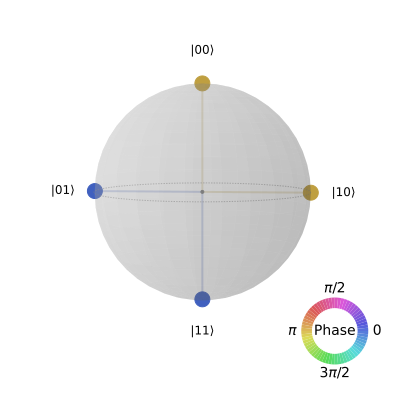

In [107]:
statevector.draw("qsphere")

In [108]:
print(statevector.probabilities())

[0.25 0.25 0.25 0.25]


In [110]:
print(statevector.sample_counts(1000))

{'00': 238, '01': 247, '10': 254, '11': 261}


## `DensityMatrix` class

quantum density matrix. Functionality for initializing and operating on the density matrix.

Matrix $\in \mathbb{C}$: enables `DensityMatrix` to represent __mixed states__, ensemble of 2 or more quantum states.

In [119]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.z(1)

dens_mat = DensityMatrix(qc)
print(dens_mat.data)

[[ 0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]]


#### Table 5.4 & 5.5

Methods and attributes of `DensityMatrix`

<img src="figures/table5-4a.png">
<img src="figures/table5-4b.png">

### Example of  `DensityMatrix` methods

Mixed state, instatiated using `from_label`

In [138]:
dens_mat = 0.5*DensityMatrix.from_label('11') + 0.5*DensityMatrix.from_label('+0')
print(dens_mat.data)

[[0.25+0.j 0.  +0.j 0.25+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.25+0.j 0.  +0.j 0.25+0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.5 +0.j]]


Use `evolve` to evolve the state with an operator and draw using city matrix

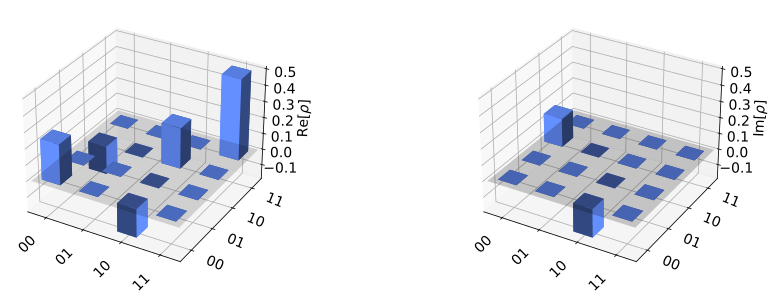

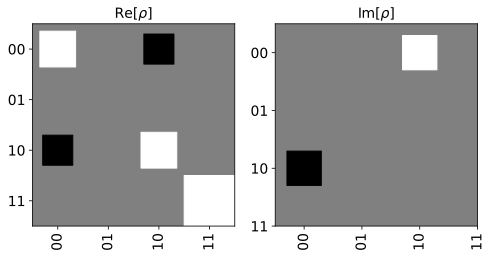

In [141]:
tt_op = Operator.from_label('TT')
dens_mat = dens_mat.evolve(tt_op)
display(dens_mat.draw("city"))
dens_mat.draw("hinton")

`probabilities` and `sample_counts`

In [142]:
print(dens_mat.probabilities())

[0.25 0.   0.25 0.5 ]


In [144]:
print(dens_mat.sample_counts(shots=1000))

{'00': 229, '10': 231, '11': 540}


## Quantum Information Operators

#### Table 5.6
<img src ="figures/table5-6.png">

Focus on 
* `Operator`
* `Pauli`

### `Operator` class

Represents a quantum information operator, modeled by a matrix. Can be placed into a `QuantumCircuit` with the `append` method.

Can be instantiated in many ways:
1. passing in a `QunatumCircuit` instance
2. passing the desired complex vector
3. passing a `Pauli`
4. passing an `Instruction` or `Gate` object

Let's see these 4:

In [147]:
#1 QuantumCircuit instance

qc = QuantumCircuit(2)
qc.id(0)
qc.x(1)

op_XI = Operator(qc)
print(op_XI.data)

array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

Notice it is the __unitary__ of the circuit. Can be used to obtain the unitary without running it on a quantum simulator!

In [149]:
#2 desired complex vector

op_XI = Operator([[0,0,1,0],
                  [0,0,0,1],
                  [1,0,0,0],
                  [0,1,0,0]])
print(op_XI.data)
                 

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [162]:
#3 Pauli
op_XI = Operator(Pauli('XI'))
print(op_XI.data)

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [165]:
#4 Instruction or Gate

op_CP = Operator(CPhaseGate(np.pi/4))
display(array_to_latex(op_CP.data))

<IPython.core.display.Latex object>

#### Table 5.7 & 5.8

Methods and attributes of `Operator`

<img src="figures/table5-7_5-8.png">


### `Pauli` class

multi-qubit Pauli operator in which each qubit is an X, Y, Z, or I Pauli. 

May be instantiated in several ways:
1. passing in a string containing Pauli ops preceded by an optional phase coefficient
2. passing a `QuantumCircuit` containing only Paulis

In [168]:
#1 string of Paulis and phase

pauli_piXZ = Pauli('-XZ')
print(pauli_piXZ.to_matrix())

[[ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.-0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.+0.j]]


In [172]:
#2 quantum circuit

qc = QuantumCircuit(2)
qc.z(0)
qc.x(1)

pauli_XZ = Pauli(qc)
print(pauli_XZ.equiv(pauli_piXZ))

## differ only by a global phase


True


#### Table 5-9 & 5.10

Methods and attributes of `Pauli`

<img src="figures/table5-9_5-10.png">


## Quantum Information Channels

#### Table 5.11
<img src="figures/table5-11.png">

For instance: 

`Kraus` class: model noise quantum channel whose qubits flip about 10% of the time. Instance creted with a matrix that model this bit-flip behavior and appended to `QuantumCircuit`


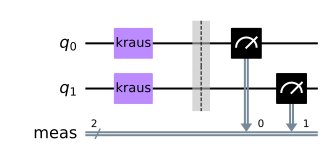

In [174]:
noise_ops = [np.sqrt(0.9)*np.array([[1,0], [0,1]]),
             np.sqrt(0.1)*np.array([[0,1], [1,0]])]
kraus  = Kraus(noise_ops)

qc = QuantumCircuit(2)
qc.append(kraus, [0])
qc.append(kraus, [1])
qc.measure_all()
qc.draw()

To see the results of the changing channel, run through simulator


In [177]:
backend = Aer.get_backend('aer_simulator')
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts(tqc)
print(counts)

{'01': 80, '11': 9, '10': 94, '00': 817}


## Quantum Information Measures

#### Table 5.12
<img src="figures/table5-12.png">

### `state_fidelity`

`state_fidelity()` takes two `Statevector` or `DensityMatrix` instances and returns the state fidelity between them. 

Ex: rotate $\pi/4$, $85\%$ state fidelity: <font color="red">Type in the book? $\pi/8 \rightarrow \pi/4$??</font>

In [179]:
sv_a = Statevector.from_label('+')
sv_b = sv_a.evolve(Operator.from_label('T'))

print(state_fidelity(sv_a, sv_b))

0.8535533905932733


In [178]:
### `state_fidelity`

# Qiskit Circuit Library Standard Operations